In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [26]:
np.min(train_images),np.max(train_images)

(0.0, 1.0)

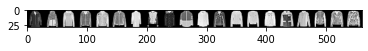

In [38]:
tmpList=[]; num=4
for i,j in zip(train_images,train_labels):
    if j==num:
        tmpList.append(i)

tmp=np.concatenate(tmpList[:20],axis=-1)

plt.imshow(tmp,'gray')

In [42]:
tmpList[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 0.        ,
        0.04705882, 0.21568627, 0.38431373, 0.20392157, 0.17647059,
        0.2745098 , 0.18431373, 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.15294118,
        0.20392157, 0.36470588, 0.56470588, 0.3254902 , 0.25882353,
        0.3372549 , 0.30588235, 0.18823529, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1372549 , 0.2627451 ,
        0.14117647, 0.4627451 , 0.59215686, 0.23529412, 0.10980392,
        0.24705882, 0.1725

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4945 - accuracy: 0.8242
Epoch 2/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3734 - accuracy: 0.8632
Epoch 3/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3340 - accuracy: 0.8778
Epoch 4/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3105 - accuracy: 0.8849
Epoch 5/30
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2935 - accuracy: 0.8898
Epoch 6/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2782 - accuracy: 0.8957
Epoch 7/30
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2680 - accuracy: 0.8994
Epoch 8/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2573 - accuracy: 0.9031
Epoch 9/30
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2462 - accuracy: 0.9078
Epoch 10/30
60

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.2807 - accuracy: 0.8846

Test accuracy: 0.8846


In [48]:
# probability_model = tf.keras.Sequential([model, 
#                                          tf.keras.layers.Softmax()])

# predictions = probability_model.predictions(test_images)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


bun=np.argmax(model.predict(test_images[0].reshape(1,28,28)))
class_names[bun]


'Ankle boot'

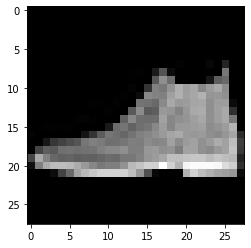

In [46]:
plt.imshow(test_images[0],'gray')

In [55]:
model.save('c:\\data\\fa')

INFO:tensorflow:Assets written to: c:\data\fa\assets


0.0 1.0
8


'Bag'

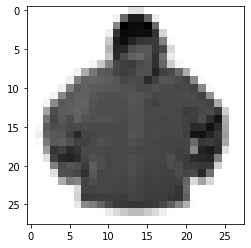

In [67]:
from PIL import Image

img=Image.open('c:\\data\\jacket.jpg').convert('L')
img=img.resize((28,28))
imgArr=np.array(img)
imscale=imgArr/255

print(np.min(imscale),np.max(imscale))
plt.imshow(imscale,'gray')

result=model.predict(imscale.reshape(1,28,28))


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(np.argmax(result))
class_names[np.argmax(result)]

In [59]:
imscale=imgArr/255
xx=1-imscale
xx_re=model.predict(xx.reshape(1,28,28))
print(np.argmax(xx_re))
pumName=class_names[np.argmax(xx_re)]
pumName

4


'Coat'

In [68]:
img.save('c:\\data\\pum\\' + pumName+ '\\s.jpg')